In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nagoya_Station_data = pd.read_excel("./datas/Nagoya_Station_data(josha).xlsx")

print(Nagoya_Station_data)

      year  station_no station_name  josha_num  ward_office  terminal  \
0     1991           0          大曽根  4785428.0            0         1   
1     1992           0          大曽根  4660204.0            0         1   
2     1993           0          大曽根  4592223.0            0         1   
3     1994           0          大曽根  4669642.0            0         1   
4     1995           0          大曽根  4629653.0            0         1   
5     1996           0          大曽根  4498914.0            0         1   
6     1997           0          大曽根  4663364.0            0         1   
7     1998           0          大曽根  4619636.0            0         1   
8     1999           0          大曽根  4375248.0            0         1   
9     2000           0          大曽根  3744964.0            0         0   
10    2001           0          大曽根  4102394.0            0         0   
11    2002           0          大曽根  4219703.0            0         0   
12    2003           0          大曽根  4859742.0     

In [2]:
#名古屋駅、金山、栄が外れ値すぎるので取り除く
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="名古屋"]
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="金山"]
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['station_name']!="栄"]

print(Nagoya_Station_data)

      year  station_no station_name  josha_num  ward_office  terminal  \
0     1991           0          大曽根  4785428.0            0         1   
1     1992           0          大曽根  4660204.0            0         1   
2     1993           0          大曽根  4592223.0            0         1   
3     1994           0          大曽根  4669642.0            0         1   
4     1995           0          大曽根  4629653.0            0         1   
5     1996           0          大曽根  4498914.0            0         1   
6     1997           0          大曽根  4663364.0            0         1   
7     1998           0          大曽根  4619636.0            0         1   
8     1999           0          大曽根  4375248.0            0         1   
9     2000           0          大曽根  3744964.0            0         0   
10    2001           0          大曽根  4102394.0            0         0   
11    2002           0          大曽根  4219703.0            0         0   
12    2003           0          大曽根  4859742.0     

In [3]:
#利用線数が0 つまりまだ駅ができていない場所を取り除く
Nagoya_Station_data=Nagoya_Station_data[Nagoya_Station_data['lines']!=0]

print(Nagoya_Station_data)

      year  station_no station_name  josha_num  ward_office  terminal  \
0     1991           0          大曽根  4785428.0            0         1   
1     1992           0          大曽根  4660204.0            0         1   
2     1993           0          大曽根  4592223.0            0         1   
3     1994           0          大曽根  4669642.0            0         1   
4     1995           0          大曽根  4629653.0            0         1   
5     1996           0          大曽根  4498914.0            0         1   
6     1997           0          大曽根  4663364.0            0         1   
7     1998           0          大曽根  4619636.0            0         1   
8     1999           0          大曽根  4375248.0            0         1   
9     2000           0          大曽根  3744964.0            0         0   
10    2001           0          大曽根  4102394.0            0         0   
11    2002           0          大曽根  4219703.0            0         0   
12    2003           0          大曽根  4859742.0     

In [4]:
#jrなどの利用者数を合算する為にgroupbyする
datas = Nagoya_Station_data.groupby(['station_name','year'])[['josha_num','lines']].sum()

print(datas)

                   josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0

In [5]:
#非0のデータを探す
#datas['josha_num'].nonzero()

In [6]:

#datas['josha_num'].nonzero()[0]

In [7]:
#非0のデータとして、nz_datasを定義
#nz_datas=datas[['josha_num','lines']].iloc[datas['josha_num'].nonzero()[0]]
#nz_datas

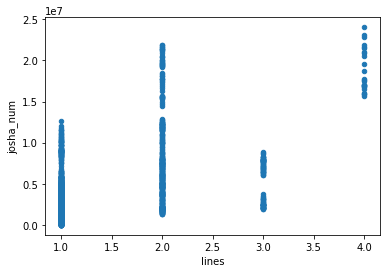

In [8]:
#横軸 駅数、縦軸　年間乗車数
datas.plot(x='lines',y='josha_num', kind='scatter')

In [9]:
datas.describe()

,josha_num,lines
count,3.085000e+03,3085.000000
mean,3.053115e+06,1.209724
std,3.465553e+06,0.521679
min,2.712000e+03,1.000000
25%,1.001091e+06,1.000000
50%,2.069170e+06,1.000000
75%,3.488874e+06,1.000000
max,2.402662e+07,4.000000


In [10]:
#相関係数
np.corrcoef(datas['lines'], datas['josha_num'])

array([[1.       , 0.5940308],
       [0.5940308, 1.       ]])

In [11]:
np.corrcoef(datas['terminal'], datas['josha_num'])

KeyError: 'terminal'

In [ ]:
X=datas.lines.values
# X = np.vstack(datas.sum().lines)
# X = np.array([[value, 1] for value in X])

In [ ]:
#Xと同じ長さの列を作成して、1埋めする
A = np.vstack([X, np.ones(len(X))]).T

In [ ]:
Y = datas.josha_num.values
#Y=np.c_[Y]

In [ ]:
#傾きa, 切片bを求める

a,b = np.linalg.lstsq(A,Y,rcond=None)[0]
print(a,b)

In [ ]:
X2 = np.arange(0, 6, 0.01)

#推定Yのplot
plt.plot(X2, a*X2 + b)

#横軸 駅数、縦軸　年間乗車数
plt.plot(X,Y,'ro')

In [ ]:
#決定係数を手計算する

#残差計算
child = ((datas['josha_num'] - (datas['lines']*a + b))**2).sum()
child

In [ ]:
#分母の計算
mother = ((datas['josha_num'] - datas['josha_num'].mean())**2).sum()
mother

In [ ]:
#決定係数
R = 1 - child / mother
R